In [224]:
from matplotlib.pyplot import *
import numpy as np

#### Construct sample data¶

In [225]:
np.pi

3.141592653589793

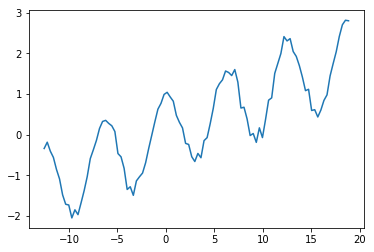

In [265]:
# The number of points in the time series. 
n = 100

x = np.linspace(-4 * np.pi, 6 * np.pi, n)
y = 0.1 * x + np.cos(x) + np.random.normal(0, 0.1, n)

plot(x, y)

#### Single exponential smooting

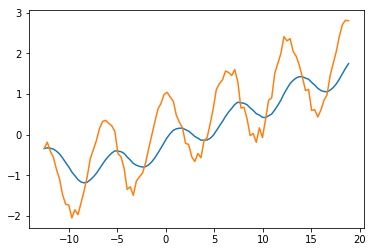

In [266]:
alpha = 0.1

s = [y[0]]
for i in range(1, len(y)):
    s.append(y[i] * alpha + s[i - 1] * (1 - alpha))
    
plot(x, s)
plot(x, y)

#### Double exponential smoothing

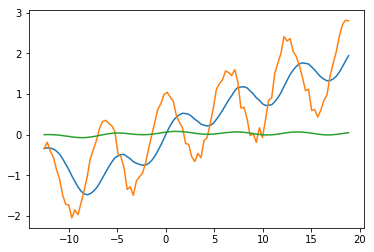

In [267]:
alpha = 0.1
beta = 0.1

s = [y[0]]
t = [0]

for i in range(1, len(y)):
    s.append(alpha * y[i] + (1 - alpha) * (s[i - 1] + t[i - 1]))
    t.append(beta * (s[i] - s[i - 1]) + (1 - beta) * t[i - 1])
    
plot(x, s)
plot(x, y)
plot(x, t)

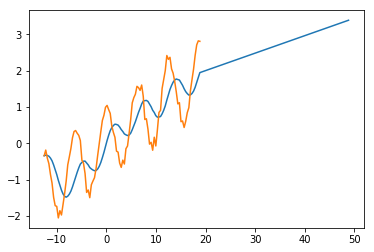

In [268]:
# forecast
x_copy = list(x)
hs = np.linspace(0, 30, 100)
x_last = x[-1]
s_last = s[-1]
t_last = t[-1]
for h in hs:
    x_copy.append(x_last + h)
    s.append(s_last + h * t_last)
plot(x_copy, s)
plot(x, y)

#### Triple exponential smoothing - additive

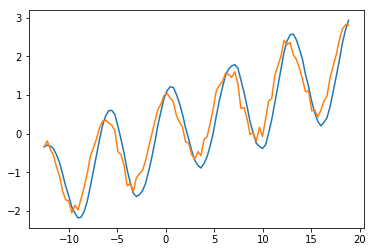

In [274]:
alpha = 0.3
beta = 0.3
gamma = 0.4

k = 10

s = [y[0]]
t = [0]
p = [0] * k

for i in range(1, k):
    s.append(alpha * y[i] + (1 - alpha) * (s[i - 1] + t[i - 1]))
    t.append(beta * (s[i] - s[i - 1]) + (1 - beta) * t[i - 1])
    
for i in range(k, len(y)):
    s.append(alpha * (y[i] - p[i - k]) + (1 - alpha) * (s[i - 1] + t[i - 1]))
    t.append(beta * (s[i] - s[i - 1]) + (1 - beta) * t[i - 1])
    p.append(gamma * (y[i] - s[i]) + (1 - gamma) * p[i - k])
    
plot(x, s)
plot(x, y)

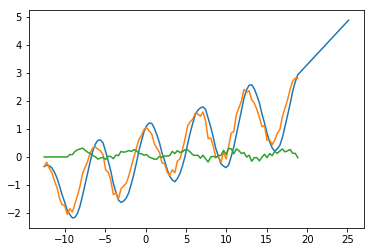

In [275]:
# forecast
x_copy = list(x)
hs = np.linspace(0, 2 * np.pi, k)

x_last = x[-1]
s_last = s[-1]
t_last = t[-1]
for j in range(len(hs)):
    h = hs[j]
    x_copy.append(x_last + h)
    s.append(s_last + h * t_last)
plot(x_copy, s)
plot(x, y)
plot(x, p)

#### Triple exponential smoothing - multiplicative

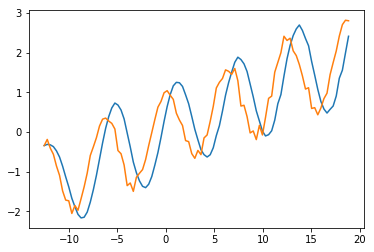

In [271]:
alpha = 0.2
beta = 0.3
gamma = 0.01

k = 10

s = [y[0]]
t = [0]
p = [1] * k

for i in range(1, k):
    s.append(alpha * y[i] + (1 - alpha) * (s[i - 1] + t[i - 1]))
    t.append(beta * (s[i] - s[i - 1]) + (1 - beta) * t[i - 1])
    
for i in range(k, len(y)):
    s.append(alpha * y[i] / p[i - k] + (1 - alpha) * (s[i - 1] + t[i - 1]))
    t.append(beta * (s[i] - s[i - 1]) + (1 - beta) * t[i - 1])
    p.append(gamma * y[i] / s[i] + (1 - gamma) * p[i - k])
    
plot(x, s)
plot(x, y)

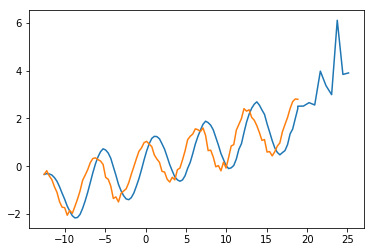

In [272]:
# forecast
x_copy = list(x)
hs = np.linspace(0, 2 * np.pi, k)

x_last = x[-1]
s_last = s[-1]
t_last = t[-1]
for j in range(len(hs)):
    h = hs[j]
    x_copy.append(x_last + h)
    s.append((s_last + h * t_last) * p[-k + j])
plot(x_copy, s)
plot(x, y)